Housing Prices
--

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import scipy as sp
import sklearn as sk

import random
import time

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output


In [2]:
#common model algorithms
from sklearn import svm, tree, gaussian_process, linear_model, ensemble

#common model help tools
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#set visual parameters
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 16,12

Know your Data
---

LOAD DATA

In [3]:
#import data
train_data = pd.read_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Housing Prices/Source Data files/train.csv")
test_data = pd.read_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Housing Prices/Source Data files/test.csv")

#make copy of training data to play with
play_data = train_data.copy()
#pass both data sets to clean everything at once
cleaning_data = [play_data, test_data]

print(test_data.info())

train_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
959,960,160,FV,24.0,2572,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,155000
670,671,60,RL,64.0,8633,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,173500
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
834,835,20,RL,75.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,9,2008,WD,Normal,139950
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


4 Cs of DATA CLEANING: Correcting, Completing, Creating and Converting
---
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

In [4]:
play_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#check for null values
print('Train data with null values:\n', play_data.isnull().sum())
print("-"*20)

print('Test data with null values:\n', test_data.isnull().sum())

#train_data.describe(include='all')

Train data with null values:
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
Ga

In [ ]:
play_data.describe(include='all')
#desc1.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/Categorical_Data_Desc2.csv", index=False)

Observations:
On Nulls
both train and test sets has 1460 and 1459 records each

PoolQC has 1453 null values - we should drop the column

MiscFeature has 1406 null values - drop column

Fence 1179 null values - drop column

Alley has 1379 null values - drop column

FireplaceQu has half null values - drop column


Nulls in:
Trian_data - LotFrontage, MasVnrType, MasVnrArea, GarageType, GarageYrBlt,
GarageFinish, GarageQual, Garagecond

Test_data - LotFrontage, MasVnrType, MasVnrArea, GarageType, GarageYrBlt, 
GarageFinish, GarageQual, Garagecond  

MSZoning, Exterior1st, Exterior2nd, kitchenQual,Functional, FireplaceQual, 
GarageCars, GarageArea, SaleType

GarageYrBlt is equal to YearBuilt for 1089 times in train_data so we can drop GarageYrBlt too



In [6]:
drop_columns1 = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

play_data.drop(drop_columns1, axis=1, inplace=True)
test_data.drop(drop_columns1, axis=1, inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,4,4,5,25,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Reg,Lvl,Inside,NAmes,Norm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,925,1311,1052,225,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Observations:

From categorical columns summary, we observe that
there are 1454 entries with Street = Pave
1459 Utilities = AllPub
1445 Condition2 = Norm
1382 LandSlope = Gtl
1360 Functional = Typ

we can drop these columns plus GarageYrBlt

In [7]:
drop_columns2 = ['Street','Condition2','Utilities','LandSlope','Functional', 'GarageYrBlt']

play_data.drop(drop_columns2, axis=1, inplace=True)
test_data.drop(drop_columns2, axis=1, inplace=True)

One more set of Categorical columns that has more than 95% of same values:

RoofMatl; Heating; CentralAir; GarageCond; Electrical; PavedDrive

In [8]:
drop_columns3 = ['RoofMatl','Heating','CentralAir','GarageCond','Electrical', 'PavedDrive']

play_data.drop(drop_columns3, axis=1, inplace=True)
test_data.drop(drop_columns3, axis=1, inplace=True)

OverallQual and OverallCond can be merged with mean of both columns

MsSuubclass is categorical column but represented as numeric

ExterQual and ExterCond can be merged

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF can be dropped as there is TotalBsmtSF

1stFlrSF and 2ndFlrSF can be dropp as there is GrLivArea [total]

LowQualFinSF can be dropped as most of the values are 0

KitchenAbvGr can be dropped as most have 1 kitchen

TotRmsAbvGrd can be dropped as it is a total of bathrooms bedrooms and kitchen #doesnt make sense adding those

PoolArea can be dropped as 1454 have 0 as PoolArea

MiscVal can be dropped as 1409 have 0


In [9]:
drop_columns4 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','KitchenAbvGr', 
                 'TotRmsAbvGrd', 'PoolArea', 'MiscVal']

play_data.drop(drop_columns4, axis=1, inplace=True)
test_data.drop(drop_columns4, axis=1, inplace=True)

In [10]:
drop_columns5 = ['LandContour','Exterior2nd','ExterCond','BsmtFinType2','GarageQual','EnclosedPorch', 
                 '3SsnPorch', 'ScreenPorch', 'BsmtCond']
play_data.drop(drop_columns5, axis=1, inplace=True)
test_data.drop(drop_columns5, axis=1, inplace=True)

In [11]:
#delete rows that have outliers
play_data.drop(play_data[play_data.Id == 186].index, inplace=True)  #outlier for the yearbuil
play_data.drop(play_data[play_data.Id == 250].index, inplace=True)
play_data.drop(play_data[play_data.Id == 314].index, inplace=True)
play_data.drop(play_data[play_data.Id == 336].index, inplace=True)
play_data.drop(play_data[play_data.Id == 707].index, inplace=True)
play_data.drop(play_data[play_data.Id == 739].index, inplace=True)  #outliers for total bathrooms
play_data.drop(play_data[play_data.Id == 922].index, inplace=True)  #outliers for total bathrooms
play_data.drop(play_data[play_data.Id == 524].index, inplace=True)  #outliers for GrLivArea
play_data.drop(play_data[play_data.Id == 1299].index, inplace=True)  #outliers for GrLivArea
#delete outlier rows for total bedrooms = 4
play_data.drop(play_data[play_data.Id == 692].index, inplace=True)
play_data.drop(play_data[play_data.Id == 1183].index, inplace=True)
play_data.drop(play_data[play_data.Id == 1170].index, inplace=True)
play_data.drop(play_data[play_data.Id == 804].index, inplace=True)
play_data.drop(play_data[play_data.Id == 1047].index, inplace=True)
play_data.drop(play_data[play_data.Id == 770].index, inplace=True)
play_data.drop(play_data[play_data.Id == 899].index, inplace=True)
play_data.drop(play_data[play_data.Id == 441].index, inplace=True)

In [12]:
print(play_data.shape)
test_data.shape

(1443, 45)


(1459, 44)

In [13]:
print('Train data with null values:\n', play_data.isnull().sum())
print("-"*20)

print('Test data with null values:\n', test_data.isnull().sum())

Train data with null values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      256
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
TotalBsmtSF        0
HeatingQC          0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
Fireplaces         0
GarageType        79
GarageFinish      79
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64
------------

Clean Data: Complete
--

In [14]:
#completing missing values

for data in cleaning_data:
    data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace = True)   
    data["TotalBsmtSF"].fillna(data["TotalBsmtSF"].mean(), inplace = True) 
    data["MasVnrType"].fillna(data["MasVnrType"].mode()[0], inplace = True) 
    data["BsmtQual"].fillna(data["BsmtQual"].mode()[0], inplace = True)
    data["BsmtExposure"].fillna(data["BsmtExposure"].mode()[0], inplace = True)
    data["BsmtFinType1"].fillna(data["BsmtFinType1"].mode()[0], inplace = True)
    data["GarageType"].fillna(data["GarageType"].mode()[0], inplace = True)
    data["GarageFinish"].fillna(data["GarageFinish"].mode()[0], inplace = True)
    data["MSZoning"].fillna(data["MSZoning"].mode()[0], inplace = True)
    data["Exterior1st"].fillna(data["Exterior1st"].mode()[0], inplace = True)
    data["SaleType"].fillna(data["SaleType"].mode()[0], inplace = True)
    data["BsmtFullBath"].ffill(inplace=True)
    data["BsmtHalfBath"].ffill(inplace=True)
    data["KitchenQual"].ffill(inplace=True)
    data["GarageCars"].ffill(inplace=True)
    data["GarageArea"].ffill(inplace=True)
    data['MasVnrArea'].fillna(0, inplace=True)



Clean Data: Create
--

NOTES:
can create a column merging BldgType and HouseStyle

OverallQual, OverallCond can be merged

TotalBsmtSF, GrLivArea can be binned

BsmtFullBath, BsmtHalfBath, FullBath, HalfBath can be summed up as TotalBaths = [BsmtFullBath+FullBath] + [BsmtHalfBath+HalfBath]/2

MoSold, YrSold can be merged



In [15]:
#Create new variables

for data in cleaning_data:
    data["TotalBaths"] = data["BsmtFullBath"]+data["FullBath"]+(data["BsmtHalfBath"]+data["HalfBath"])/2    #Add all family members including the passenger to get familysize
    data["Yr-MoSold"] = data["YrSold"].astype(str)+"-"+data["MoSold"].astype(str)
    data["HousingStyle"] = data["BldgType"]+"-"+data["HouseStyle"]
    data["OvrallQuality"] = (data["OverallQual"]+data["OverallCond"])/2  #set IsAlone to 0 if family size is greater than 1
    #split title from names
   # data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    #Fare Bins/Buckets using qcut. we are making 4 bins
    data["GrLivAreaBin"] = pd.cut(data["GrLivArea"],5)    
    data["YrBltBin"] = pd.cut(data["YearBuilt"],6)
    #Age bins/buckets using cut. 
    data['BsmtSFBin'] = pd.cut(data['TotalBsmtSF'], 5)
    data['LotAreaBin'] = pd.cut(data['LotArea'], 5)   
    data['PorchSF'] = data['WoodDeckSF']+data['OpenPorchSF']
    data['PorchSFBin'] = pd.cut(data['PorchSF'],5)

#play_data.info()
#test_data.info()
play_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,TotalBaths,Yr-MoSold,HousingStyle,OvrallQuality,GrLivAreaBin,YrBltBin,BsmtSFBin,LotAreaBin,PorchSF,PorchSFBin
602,603,60,RL,80.0,10041,IR1,Inside,SawyerW,Norm,1Fam,...,3.5,2006-2,1Fam-2Story,6.5,"(1597.6, 2229.4]","(1987.0, 2010.0]","(641.2, 1282.4]","(1230.539, 15192.2]",270,"(185.8, 371.6]"
627,628,80,RL,80.0,9600,Reg,Inside,NAmes,Norm,1Fam,...,2.0,2010-3,1Fam-SLvl,6.0,"(965.8, 1597.6]","(1941.0, 1964.0]","(641.2, 1282.4]","(1230.539, 15192.2]",0,"(-0.929, 185.8]"
190,191,70,RL,70.0,10570,Reg,Inside,Crawfor,Norm,1Fam,...,2.5,2007-12,1Fam-2Story,8.0,"(2229.4, 2861.2]","(1918.0, 1941.0]","(641.2, 1282.4]","(1230.539, 15192.2]",74,"(-0.929, 185.8]"
68,69,30,RM,47.0,4608,Reg,Corner,OldTown,Artery,1Fam,...,1.0,2010-6,1Fam-1Story,5.0,"(330.841, 965.8]","(1941.0, 1964.0]","(641.2, 1282.4]","(1230.539, 15192.2]",0,"(-0.929, 185.8]"
328,329,75,RL,69.0,11888,IR1,Inside,BrkSide,PosN,1Fam,...,2.0,2009-7,1Fam-2.5Unf,6.0,"(1597.6, 2229.4]","(1895.0, 1918.0]","(641.2, 1282.4]","(1230.539, 15192.2]",60,"(-0.929, 185.8]"
906,907,20,RL,116.0,13501,IR1,Corner,Somerst,Norm,1Fam,...,3.0,2007-6,1Fam-1Story,6.5,"(1597.6, 2229.4]","(1987.0, 2010.0]","(1282.4, 1923.6]","(1230.539, 15192.2]",60,"(-0.929, 185.8]"
1387,1388,50,RM,60.0,8520,Reg,Inside,OldTown,Artery,1Fam,...,2.0,2007-8,1Fam-1.5Fin,6.5,"(2229.4, 2861.2]","(1895.0, 1918.0]","(641.2, 1282.4]","(1230.539, 15192.2]",103,"(-0.929, 185.8]"
35,36,60,RL,108.0,13418,Reg,Inside,NridgHt,Norm,1Fam,...,3.5,2006-9,1Fam-2Story,6.5,"(2229.4, 2861.2]","(1987.0, 2010.0]","(641.2, 1282.4]","(1230.539, 15192.2]",145,"(-0.929, 185.8]"
844,845,50,RM,100.0,12665,IR1,Inside,OldTown,Artery,1Fam,...,1.5,2008-6,1Fam-1.5Fin,6.5,"(965.8, 1597.6]","(1895.0, 1918.0]","(641.2, 1282.4]","(1230.539, 15192.2]",418,"(371.6, 557.4]"
1427,1428,50,RL,60.0,10930,Reg,Inside,NAmes,Artery,1Fam,...,2.5,2008-4,1Fam-1.5Fin,5.5,"(965.8, 1597.6]","(1941.0, 1964.0]","(641.2, 1282.4]","(1230.539, 15192.2]",0,"(-0.929, 185.8]"


In [17]:
print('Train data with null values:\n', play_data.isnull().sum())
print("-"*20)

print('Test data with null values:\n', test_data.isnull().sum())

Train data with null values:
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
TotalBsmtSF      0
HeatingQC        0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
TotalBaths       0
Yr-MoSold        0
HousingStyle     0
OvrallQuality    0
GrLivAreaBin     0
YrBltBin         0
B

In [18]:

#desc = play_data.describe(include='all')

Export Cleaned training and test datasets
#play_data.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Housing Prices/Source Data files/clean_train_data.csv", index=False)
#test_data.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Housing Prices/Source Data files/clean_test_data.csv", index=False)

Clean Data: Convert
--

In [16]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset
#code categorical data
label = LabelEncoder()
for dataset in cleaning_data:    
    dataset['YrSold_Code'] = label.fit_transform(dataset['YrSold'])
    dataset['MoSold_Code'] = label.fit_transform(dataset['MoSold'])    
    dataset['HsStyle_Code'] = label.fit_transform(dataset['HousingStyle'])
    dataset['MSZone_Code'] = label.fit_transform(dataset['MSZoning'])
    dataset['ExterQual_Code'] = label.fit_transform(dataset['ExterQual'])
    dataset['GrgCars_Code'] = label.fit_transform(dataset['GarageCars'])
    dataset['TotalBaths_Code'] = label.fit_transform(dataset['TotalBaths'])
    dataset['TotalBeds_Code'] = label.fit_transform(dataset['BedroomAbvGr'])
    dataset['YrBltBin_Code'] = label.fit_transform(dataset['YrBltBin'])
    dataset['OverallQuality_Code'] = label.fit_transform(dataset['OvrallQuality'])
    dataset['Neighborhood_Code'] = label.fit_transform(dataset['Neighborhood'])
    dataset['GrLivAreaBin_Code'] = label.fit_transform(dataset['GrLivAreaBin'])
    dataset['BsmtSFBin_Code'] = label.fit_transform(dataset['BsmtSFBin'])
    dataset['LotAreaBin_Code'] = label.fit_transform(dataset['LotAreaBin'])
    dataset['Ext1st_Code'] = label.fit_transform(dataset['Exterior1st'])
    dataset['BsmtFinType_Code'] = label.fit_transform(dataset['BsmtFinType1']) #proved to be useful
    dataset['PorchSFBin_Code'] = label.fit_transform(dataset['PorchSFBin']) #proved to be useless - so deleted in the calculation
    dataset['Foundation_Code'] = label.fit_transform(dataset['Foundation']) #proved to be useless
    
#define y variable aka target/outcome
Target = ['SalePrice']

#define x variables for original features aka feature selection
play_data_x = ['YrSold', 'MoSold','HousingStyle', 'MSZoning','GarageCars', 'TotalBaths', 'BedroomAbvGr', 'YrBltBin', 
               'OvrallQuality','Neighborhood', 'GrLivArea', 'LotArea','TotalBsmtSF', 'Exterior1st', 'BsmtFinType1'] #pretty name/values for charts
play_data_x_calc = ['YrSold_Code','MoSold_Code','HsStyle_Code', 'MSZone_Code', 'GrgCars_Code','TotalBaths_Code', 'TotalBeds_Code', 'YrBltBin_Code',
                    'OverallQuality_Code' ,'Neighborhood_Code', 'GrLivAreaBin_Code', 'BsmtSFBin_Code', 'LotAreaBin_Code',
                   'Ext1st_Code', 'BsmtFinType_Code'] #coded for algorithm calculation
play_data_xy =  Target + play_data_x
print('Original X Y: ', play_data_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
play_data_x_bin = ['YrSold_Code','HsStyle_Code', 'MSZone_Code','GrgCars_Code','TotalBaths_Code','TotalBeds_Code','YrBltBin_Code',
                   'OverallQuality_Code', 'Neighborhood_Code' ,'GrLivAreaBin_Code', 'BsmtSFBin_Code', 'LotAreaBin_Code',
                  'Ext1st_Code', 'BsmtFinType_Code']
play_data_xy_bin = Target + play_data_x_bin
print('Bin X Y: ', play_data_xy_bin, '\n')

#define x and y variables for dummy features original
play_data_dummy = pd.get_dummies(play_data[play_data_x])
play_data_YrSold = pd.get_dummies(play_data['YrSold'], prefix='YrSold')
play_data_YrSold_dum = play_data_YrSold.columns.tolist()
play_data_MoSold = pd.get_dummies(play_data['MoSold'], prefix='MoSold')
play_data_MoSold_dum = play_data_YrSold.columns.tolist()
play_data_x_dummy = play_data_dummy.columns.tolist()
play_data_xy_dummy = Target + play_data_x_dummy + play_data_YrSold_dum + play_data_MoSold_dum
print('Dummy X Y: ', play_data_xy_dummy, '\n')
#play_data_full_dummy=play_data_dummy
#play_data_dummy[['Pclass_1','Pclass_2','Pclass_3']] = play_data_Pclass

play_data[play_data_x_bin].sample(20)

Original X Y:  ['SalePrice', 'YrSold', 'MoSold', 'HousingStyle', 'MSZoning', 'GarageCars', 'TotalBaths', 'BedroomAbvGr', 'YrBltBin', 'OvrallQuality', 'Neighborhood', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'Exterior1st', 'BsmtFinType1'] 

Bin X Y:  ['SalePrice', 'YrSold_Code', 'HsStyle_Code', 'MSZone_Code', 'GrgCars_Code', 'TotalBaths_Code', 'TotalBeds_Code', 'YrBltBin_Code', 'OverallQuality_Code', 'Neighborhood_Code', 'GrLivAreaBin_Code', 'BsmtSFBin_Code', 'LotAreaBin_Code', 'Ext1st_Code', 'BsmtFinType_Code'] 

Dummy X Y:  ['SalePrice', 'YrSold', 'MoSold', 'GarageCars', 'TotalBaths', 'BedroomAbvGr', 'OvrallQuality', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'HousingStyle_1Fam-1.5Fin', 'HousingStyle_1Fam-1.5Unf', 'HousingStyle_1Fam-1Story', 'HousingStyle_1Fam-2.5Fin', 'HousingStyle_1Fam-2.5Unf', 'HousingStyle_1Fam-2Story', 'HousingStyle_1Fam-SFoyer', 'HousingStyle_1Fam-SLvl', 'HousingStyle_2fmCon-1.5Fin', 'HousingStyle_2fmCon-1.5Unf', 'HousingStyle_2fmCon-1Story', 'HousingStyle_2fmCon-2.5F

,YrSold_Code,HsStyle_Code,MSZone_Code,GrgCars_Code,TotalBaths_Code,TotalBeds_Code,YrBltBin_Code,OverallQuality_Code,Neighborhood_Code,GrLivAreaBin_Code,BsmtSFBin_Code,LotAreaBin_Code,Ext1st_Code,BsmtFinType_Code
120,0,7,3,2,2,1,4,8,4,0,0,0,9,0
230,4,2,3,1,2,3,3,9,12,0,0,0,8,5
1101,1,2,3,1,0,3,4,7,12,0,0,0,6,1
386,0,0,3,0,0,5,1,5,7,0,0,0,13,5
1304,0,25,4,2,2,3,5,9,7,1,0,0,12,5
514,1,1,3,1,0,2,2,7,6,0,0,0,13,5
1264,2,24,2,2,4,2,5,8,12,0,1,0,8,2
591,3,5,3,3,5,3,5,12,16,1,1,0,5,2
1093,0,2,3,2,3,1,4,10,12,0,0,0,8,2
532,4,2,3,1,0,2,3,9,12,0,0,0,12,5


Split Train and Val Data
--

In [17]:
#split train and validate data 
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(play_data[play_data_x_calc], play_data[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(play_data[play_data_x_bin], play_data[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(play_data_dummy[play_data_x_dummy], play_data[Target], random_state = 0)


print("Play_data Shape: {}".format(play_data.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.sample(10)

Play_data Shape: (1452, 73)
Train1 Shape: (1089, 15)
Test1 Shape: (363, 15)


,YrSold_Code,HsStyle_Code,MSZone_Code,GrgCars_Code,TotalBaths_Code,TotalBeds_Code,YrBltBin_Code,OverallQuality_Code,Neighborhood_Code,GrLivAreaBin_Code,BsmtSFBin_Code,LotAreaBin_Code,Ext1st_Code,BsmtFinType_Code
439,3,0,3,2,0,3,2,11,7,0,0,0,13,5
59,2,2,3,1,0,2,4,9,5,0,0,0,6,0
1239,1,2,3,2,2,2,5,10,23,1,1,0,12,2
1414,2,0,3,2,1,4,2,10,3,1,0,0,13,5
829,0,21,1,2,3,2,5,9,21,0,0,0,8,5
771,0,2,3,2,0,2,3,6,7,0,0,0,13,3
926,1,5,3,3,3,4,5,10,16,1,0,0,12,5
538,0,2,3,1,1,3,4,7,19,0,0,0,9,1
13,1,2,3,3,2,3,5,9,5,1,1,0,12,5
862,4,2,3,2,2,3,4,8,20,0,0,0,6,2


Exploratory Data Analysis
--

In [ ]:
#variable correlation by saleprice

for x in play_data_x:
    if play_data[x].dtype !='float64':
        print('SalePrice ', x)
        print(play_data[[x,Target[0]]].groupby(x, as_index=False).mean())
        print('-'*25,'\n')


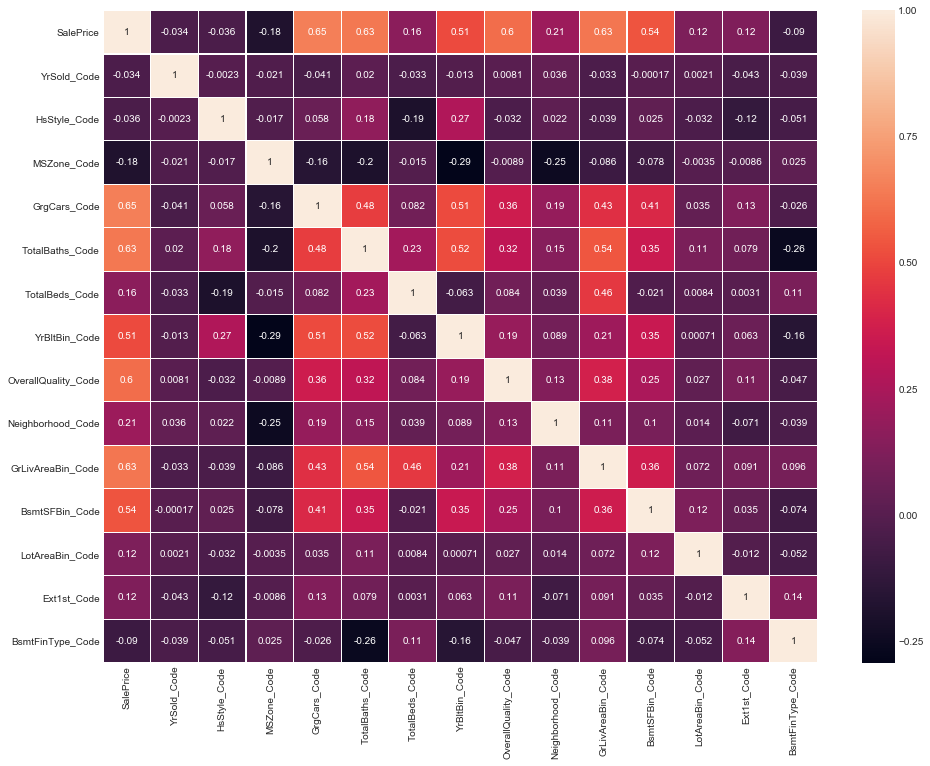

In [20]:
df1 = play_data[play_data_xy_bin]
#df2=df1.drop(columns=['Age','Pclass'])
corr = df1.corr()
sns.heatmap(corr, annot=True, linewidths = 0.1, linecolor = 'white')

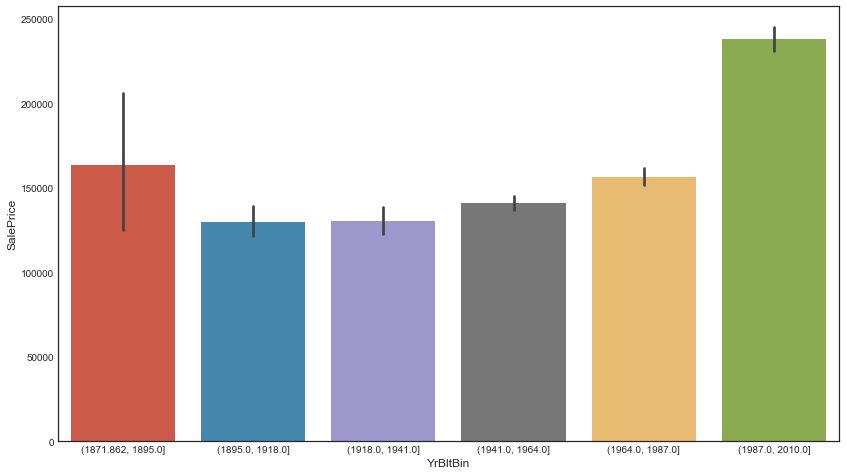

In [79]:
sns.barplot(x = 'YrBltBin', y = 'SalePrice',  data=play_data)

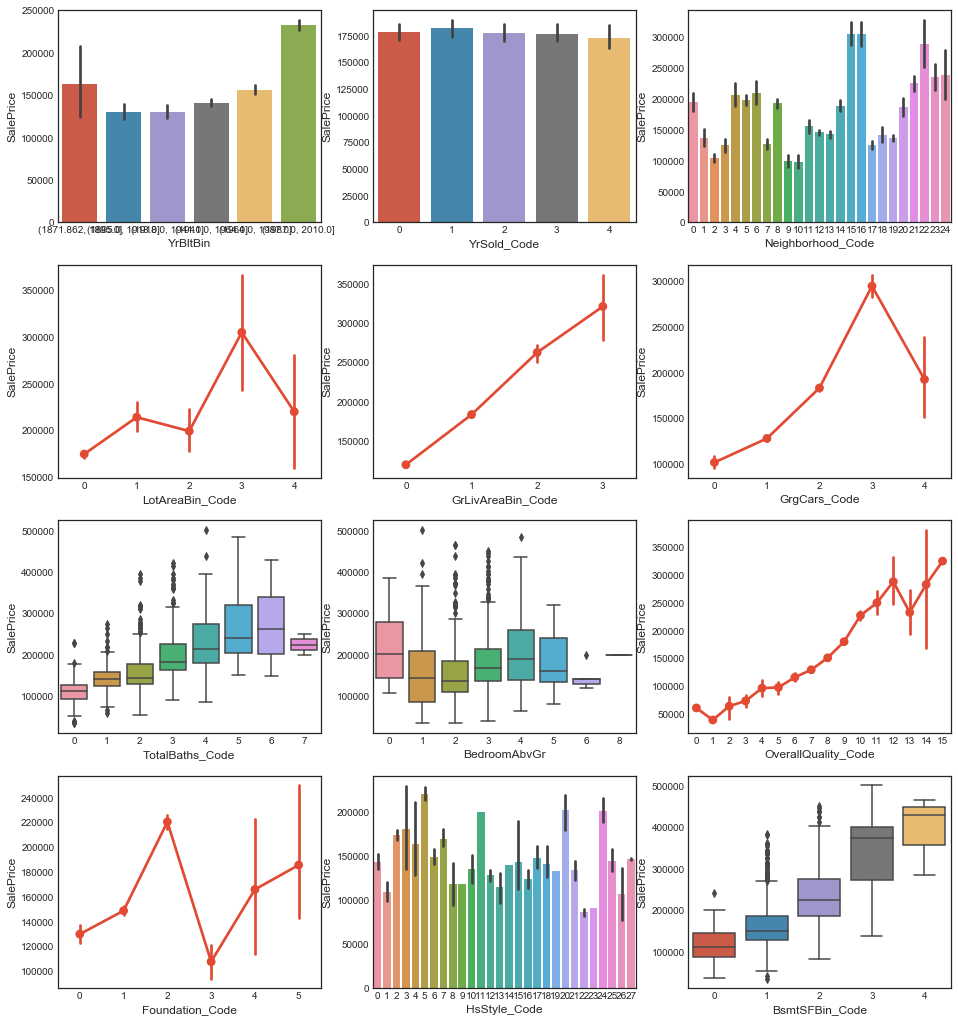

In [232]:
#graph individual features by survival
fig, saxis = plt.subplots(4, 3,figsize=(16,18))

sns.barplot(x = 'YrBltBin', y = 'SalePrice', data=play_data, ax = saxis[0,0])
sns.barplot(x = 'YrSold_Code', y = 'SalePrice', data=play_data, ax = saxis[0,1])
sns.barplot(x = 'Neighborhood_Code', y = 'SalePrice', data=play_data, ax = saxis[0,2])

sns.pointplot(x = 'LotAreaBin_Code', y = 'SalePrice',  data=play_data, ax = saxis[1,0])
sns.pointplot(x = 'GrLivAreaBin_Code', y = 'SalePrice',  data=play_data, ax = saxis[1,1])
sns.pointplot(x = 'GrgCars_Code', y = 'SalePrice', data=play_data, ax = saxis[1,2])

#sns.swarmplot(x='Survived', y = 'AgeBin', hue = 'Sex', data=play_data, ax = saxis[2,0])
#sns.distplot([play_data[play_data['Survived']==0]['Age']],color = 'r', ax = saxis[2,1])
sns.boxplot(x='TotalBaths_Code', y = 'SalePrice', data=play_data, ax = saxis[2,0])
sns.boxplot(x='BedroomAbvGr', y = 'SalePrice', data=play_data, ax=saxis[2,1])
sns.pointplot(x='OverallQuality_Code', y='SalePrice', data=play_data, ax=saxis[2,2])

sns.pointplot(x='Foundation_Code', y = 'SalePrice', data=play_data, ax=saxis[3,0])
sns.barplot(x='HsStyle_Code', y = 'SalePrice', data=play_data, ax=saxis[3,1])
sns.boxplot(x='BsmtSFBin_Code', y='SalePrice', data=play_data, ax=saxis[3,2])

Text(0.5,1,'MasVnrArea')

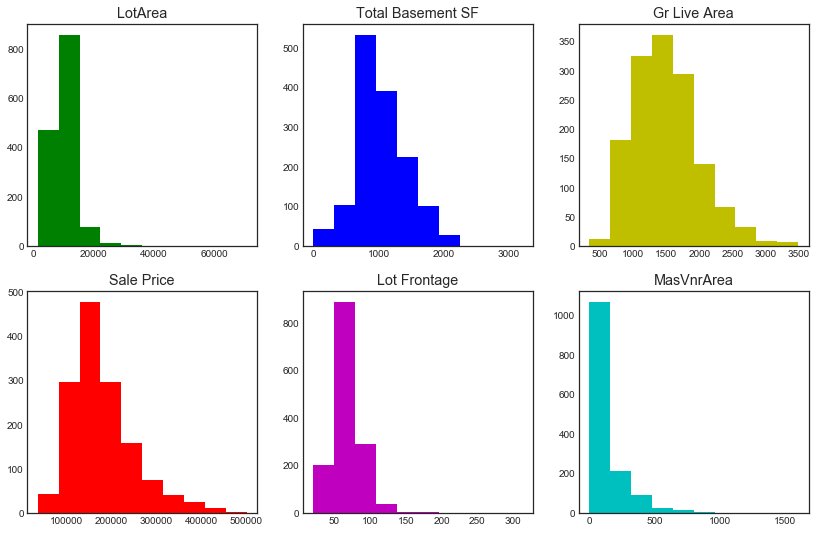

In [245]:
#plot histograms
plt.figure(figsize=[14,9])

plt.subplot(231)
plt.hist(x = play_data['LotArea'], color='g')
plt.title('LotArea')

plt.subplot(232)
plt.hist(x = play_data['TotalBsmtSF'], color='b')
plt.title('Total Basement SF')

plt.subplot(233)
plt.hist(x = play_data['GrLivArea'], color='y')
plt.title('Gr Live Area')

plt.subplot(234)
plt.hist(x = play_data['SalePrice'], color='r')
plt.title('Sale Price')

plt.subplot(235)
plt.hist(x = play_data['LotFrontage'], color='m')
plt.title('Lot Frontage')

plt.subplot(236)
plt.hist(x = play_data['MasVnrArea'], color='c')
plt.title('MasVnrArea')


In [ ]:
#dat = play_data
plt.figure()
plt.boxplot(play_data['TotalBsmtSF'])
#dat.shape

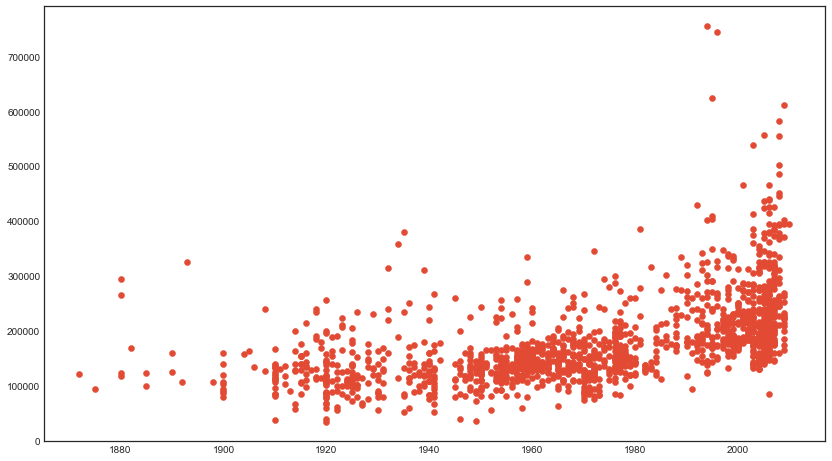

In [97]:
#graph individual features by survival
#fig, saxis = plt.subplots(1,2,figsize=(16,12))
plt.scatter('YearBuilt', 'SalePrice', data=play_data)


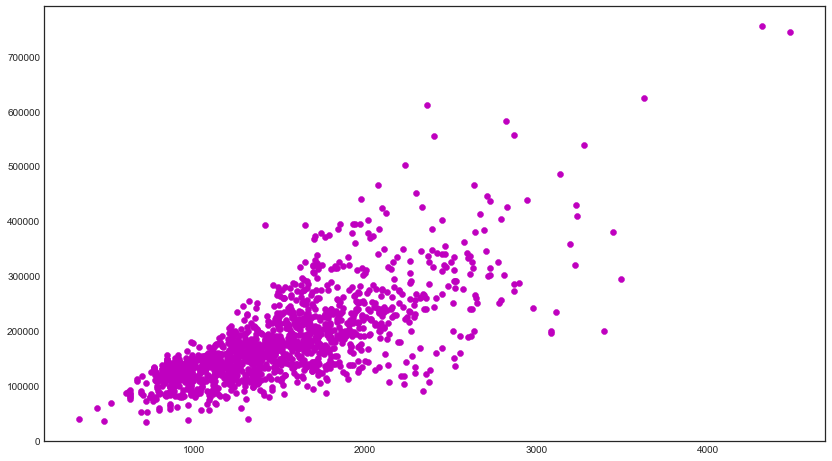

In [174]:
plt.scatter('GrLivArea', 'SalePrice', data=play_data, color = 'm')

Model Data
---

In [21]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    #Gaussian Processes
    #gaussian_process.GaussianProcessRegressor(),  
    #GLM
    linear_model.LinearRegression(),
    linear_model.Lasso(),
    linear_model.RidgeCV(),
    linear_model.ElasticNetCV(),    
    #Trees
    tree.DecisionTreeRegressor()
]

In [22]:
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, train_size = .7, test_size = .3, 
                                        random_state = 0) #run model 10 times with 60%train data and 30%test data leaving 10%
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 
               'MLA Test Accuracy 3*STD', 'MLA Time', 'MLA RMSE']
MLA_compare = pd.DataFrame(columns=MLA_columns)
#create table for MLA Predict
MLA_predict = play_data[Target]
#index through MLA and ave performance to table
row_index=0
for alg in MLA:          
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name    
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params()) #set name and params
        #score model with cross validation
    cv_results = model_selection.cross_validate(alg, play_data[play_data_x_bin], play_data[Target], cv=cv_split)    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
        #should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    MLA_compare.loc[row_index, 'MLA RMSE'] = np.sqrt(((cv_results['test_score']-cv_results['train_score'])**2).mean())    
    alg.fit(play_data[play_data_x_bin], play_data[Target])
    MLA_predict = alg.predict(play_data[play_data_x_bin])    
    row_index+=1
#print and sort table

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,MLA RMSE
1,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.917469,0.860238,0.0388966,0.113607,0.0594423
2,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.963524,0.816789,0.0854854,0.0264079,0.150015
3,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.762577,0.771249,0.0451929,0.00319591,0.0240578
4,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.762577,0.771241,0.0451876,0.00160007,0.024053
5,RidgeCV,"{'alphas': (0.1, 1.0, 10.0), 'cv': None, 'fit_...",0.76242,0.770683,0.0436991,0.00399988,0.0234221
0,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.807303,0.76277,0.0512893,0.0964028,0.0494025
7,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.996196,0.704715,0.0900576,0.00399268,0.292959
6,ElasticNetCV,"{'alphas': None, 'copy_X': True, 'cv': None, '...",0.0832149,0.0799537,0.0176366,0.0503947,0.00654096


Text(0,0.5,'Algorithm')

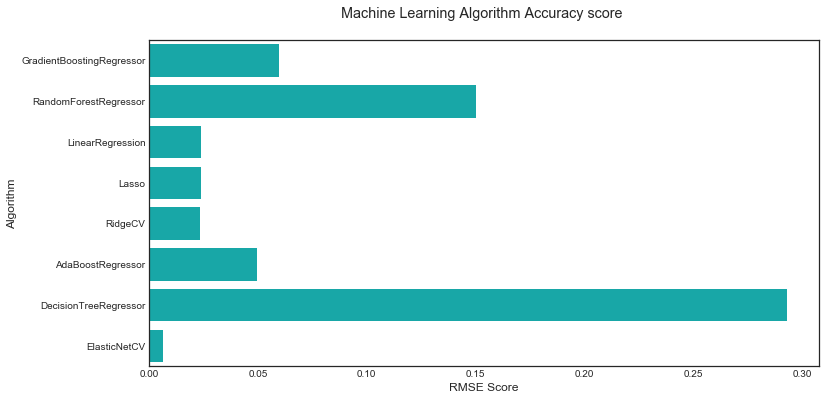

In [23]:
#barplot for Test Accuracy Mean
plt.subplots(figsize=[12,6])
sns.barplot(x='MLA RMSE', y='MLA Name', data=MLA_compare, color = 'c')

plt.title('Machine Learning Algorithm Accuracy score \n')
plt.xlabel('RMSE Score')
plt.ylabel('Algorithm')

Tuning
---
Can we Make it Better? Tweak with Hyperparameters


In [212]:
#use ridgeCV to tune the model

ridge = linear_model.RidgeCV()
base_results = model_selection.cross_validate(ridge, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
ridge.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', ridge.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)


Before Ridge parameters: {'alphas': (0.1, 1.0, 10.0), 'cv': None, 'fit_intercept': True, 'gcv_mode': None, 'normalize': False, 'scoring': None, 'store_cv_values': False}
Before Ridge Training w/bin score mean: 79.54
Before Ridge Test w/bin score mean: 79.23
Before Ridge RMSE: 0.0207
--------------------


In [166]:
#Predict using ridgeCV tuned model
test_data['SalePrice']=ridge.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/hpevaluation_submission1.csv", index=False)

In [167]:
#use gradientboostingregressor to tune the model

grad = ensemble.GradientBoostingRegressor()
base_results = model_selection.cross_validate(grad, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
grad.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', grad.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)


Before Ridge parameters: {'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}
Before Ridge Training w/bin score mean: 93.24
Before Ridge Test w/bin score mean: 85.31
Before Ridge RMSE: 0.0811
--------------------


In [130]:
#Predict using GradientBooster tuned model
test_data['SalePrice']=grad.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/hpevaluation_submission2.csv", index=False)

In [137]:
#tune gradientboostingregressor to tune the model

grad_tune = ensemble.GradientBoostingRegressor()
base_results = model_selection.cross_validate(grad_tune, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
grad_tune.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', grad.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)


# Use a grid over parameters of interest
param_grid = {"criterion": ['friedman_mse','mse'],
              "n_estimators" : [32, 64, 100, 150, 200],
              #"learning_rate" : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
           "max_depth" : [5, 10, 15],
           "min_samples_leaf" : [1, 2],
             "min_samples_split" : [2,4,8,10]}

tune_model2 = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(), 
                                          param_grid=param_grid, cv = cv_split)
tune_model2.fit(play_data[play_data_x_bin],play_data[Target])

print('After DT parameters:', tune_model2.best_params_)
print('After DT Training w/bin score mean: {:,.2f}'.format(tune_model2.cv_results_['mean_train_score'][tune_model2.best_index_].mean()*100))
print('After DT Test w/bin score mean: {:,.2f}'.format(tune_model2.cv_results_['mean_test_score'][tune_model2.best_index_].mean()*100))
#print('After DT Test 3*std: +/- {:,.2f}'.format(tune_model2.cv_results_['std_test_score'][tune_model2.best_index_]*100*3))
print('-'*20)


Before Ridge parameters: {'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}
Before Ridge Training w/bin score mean: 93.46
Before Ridge Test w/bin score mean: 85.43
Before Ridge RMSE: 0.0824
--------------------
After DT parameters: {'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
After DT Training w/bin score mean: 97.01
After DT Test w/bin score mean: 84.88
--------------------


In [139]:
#Predict using GradientBooster tuned model
test_data['SalePrice']=tune_model2.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/hpevaluation_submission3.csv", index=False)

In [142]:
#tune gradientboostingregressor to tune the model

grad_tune2 = ensemble.GradientBoostingRegressor(learning_rate=.025,criterion='mse', max_depth=5, 
                                               min_samples_leaf=22, min_samples_split=10, n_estimators=100)
base_results = model_selection.cross_validate(grad_tune2, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
grad_tune2.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', grad_tune2.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
#print('-'*20)


Before Ridge parameters: {'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.025, 'loss': 'ls', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 22, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}
Before Ridge Training w/bin score mean: 85.74
Before Ridge Test w/bin score mean: 82.67
Before Ridge RMSE: 0.0417


In [290]:
#Predict using GradientBooster tuned model
test_data['SalePrice']=grad_rfe.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/hpeval_submsn11.csv", index=False)

Feature Selection
--

In [289]:
#select only required features using RFE 
grad = ensemble.GradientBoostingRegressor()
base_results = model_selection.cross_validate(grad, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
grad.fit(play_data[play_data_x_bin], play_data[Target])

print('Before GradBst RFE Training shape', play_data[play_data_x_bin].shape)
print('Before GradBst RFE Training Features', play_data[play_data_x_bin].columns.values)

print('Before GradBst Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before GradBst Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before GradBst Test RMSE:  {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)

#feature_selection
grad_rfe = feature_selection.RFECV(grad, step =1,  cv = cv_split)
grad_rfe.fit(play_data[play_data_x_bin], play_data[Target]) #alternatively, you can use pipeline to redue features

x_rfe = play_data[play_data_x_bin].columns.values[grad_rfe.get_support()]
rfe_results = model_selection.cross_validate(grad, play_data[x_rfe], play_data[Target], cv=cv_split)

print('After GradBst RFE New shape', play_data[x_rfe].shape)
print('After GradBst RFE New Features', x_rfe)

print('After GradBst RFE Training w/bin score mean: {:,.2f}'.format(rfe_results['train_score'].mean()*100))
print('After GradBst RFE Test w/bin score mean: {:,.2f}'.format(rfe_results['test_score'].mean()*100))
print('After GradBst RFE Test RMSE:  {:,.4f}'.format(np.sqrt(((rfe_results['test_score']-rfe_results['train_score'])**2).mean())))
print('-'*20)


Before GradBst RFE Training shape (1435, 14)
Before GradBst RFE Training Features ['YrSold_Code' 'HsStyle_Code' 'MSZone_Code' 'GrgCars_Code'
 'TotalBaths_Code' 'TotalBeds_Code' 'YrBltBin_Code' 'OverallQuality_Code'
 'Neighborhood_Code' 'GrLivAreaBin_Code' 'BsmtSFBin_Code'
 'LotAreaBin_Code' 'Ext1st_Code' 'BsmtFinType_Code']
Before GradBst Training w/bin score mean: 93.16
Before GradBst Test w/bin score mean: 87.16
Before GradBst Test RMSE:  0.0615
--------------------
After GradBst RFE New shape (1435, 12)
After GradBst RFE New Features ['HsStyle_Code' 'MSZone_Code' 'GrgCars_Code' 'TotalBaths_Code'
 'TotalBeds_Code' 'YrBltBin_Code' 'OverallQuality_Code'
 'Neighborhood_Code' 'GrLivAreaBin_Code' 'BsmtSFBin_Code' 'Ext1st_Code'
 'BsmtFinType_Code']
After GradBst RFE Training w/bin score mean: 92.84
After GradBst RFE Test w/bin score mean: 87.38
After GradBst RFE Test RMSE:  0.0559
--------------------


Tuning Lasso
--

In [283]:
#use ridgeCV to tune the model

lass = linear_model.Lasso(alpha=0.1, random_state=0, )
base_results = model_selection.cross_validate(lass, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
lass.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', lass.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)


Before Ridge parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Before Ridge Training w/bin score mean: 81.14
Before Ridge Test w/bin score mean: 79.78
Before Ridge RMSE: 0.0188
--------------------


In [284]:
#Predict using GradientBooster tuned model
test_data['SalePrice']=lass.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/hpeval_submsn10.csv", index=False)

Tuning Random Forest
--

In [25]:
#use randomforestregressor to tune the model

rf = ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1)
base_results = model_selection.cross_validate(rf, play_data[play_data_x_bin], play_data[Target], cv = cv_split)
rf.fit(play_data[play_data_x_bin], play_data[Target])

print('Before Ridge parameters:', rf.get_params())
print('Before Ridge Training w/bin score mean: {:,.2f}'.format(base_results['train_score'].mean()*100))
print('Before Ridge Test w/bin score mean: {:,.2f}'.format(base_results['test_score'].mean()*100))
print('Before Ridge RMSE: {:,.4f}'.format(np.sqrt(((base_results['test_score']-base_results['train_score'])**2).mean())))
print('-'*20)


Before Ridge parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Before Ridge Training w/bin score mean: 97.37
Before Ridge Test w/bin score mean: 83.66
Before Ridge RMSE: 0.1392
--------------------


In [27]:
#Predict using RandomForest tuned model
test_data['SalePrice']=rf.predict(test_data[play_data_x_bin])

#submit file
submit = test_data[['Id','SalePrice']]
submit.to_csv("C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Titanic Challenge/eval1.csv", index=False)